##  Notebook 00a: sub-SEVIR Classification ML Models 

### Goal: Train and evaluate classification ML models on the sub-SEVIR dataset 

In this notebook, we train and evaluate classification machine learning (ML) models on the sub-SEVIR dataset. sub-SEVIR is a lower-resolution version of the Storm Event Imagery Dataset. The new spatial resolution is 8 km with a 60 min timestep resolution for each event. Our goal is to train a classification model to predict whether a storm-centered image contains a lightning flash (yes/no). 

For simplicity, we limited our model selection to logistic regression, random forests, and gradient-boosted trees. For each model, the default hyperparameters were used. 

#### Import the neccesary packages

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

In [2]:
import sys,os
top_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(top_path,'scripts/'))

# Plots ROC, performance, and reliability diagram given a model, X, and y
from verification import plot_verification
from util import load_ml_data 

### Load the data 

We have provided a IO function for loading the ML data. Uncomment the following cell and execute it to learn more about the input arguments. 

In [3]:
# Uncomment and execute this cell to learn about the input args.
#help(load_ml_data)

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_ml_data()

### Create the model pipelines and fit the models

When training ML models, we often have to pre-processing the data. For this example, we want to scaling the data so that each feature has a mean of zero and variance of 1. Scikit-learn has a great feature known as [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) where the pre-processing is incorporated into the model. Thus, when call `.predict` or `.predict_proba`, the pre-processing is applied internally. 


In [5]:
# Make a pipeline. 
steps = [('StandardScaler', StandardScaler() )]
clfs = [( 'LR', LogisticRegression(max_iter=300)), 
        ( 'GBT', HistGradientBoostingClassifier(loss='binary_crossentropy')), 
        ( 'RF', RandomForestClassifier(n_estimators=200, n_jobs=4))
       ]

fit_clfs = [(e[0], Pipeline(steps+[e]).fit(X_train, y_train)) for e in clfs]

### Evaluate the model performance 

We provide verification plotting scripts for classification and regression. In this example, we can pass in our fit classifiers and the testing data (`X_test` and `y_test`) and get the reliability, performance, and ROC diagrams. These are the bootstrap mean curves for each diagram. 



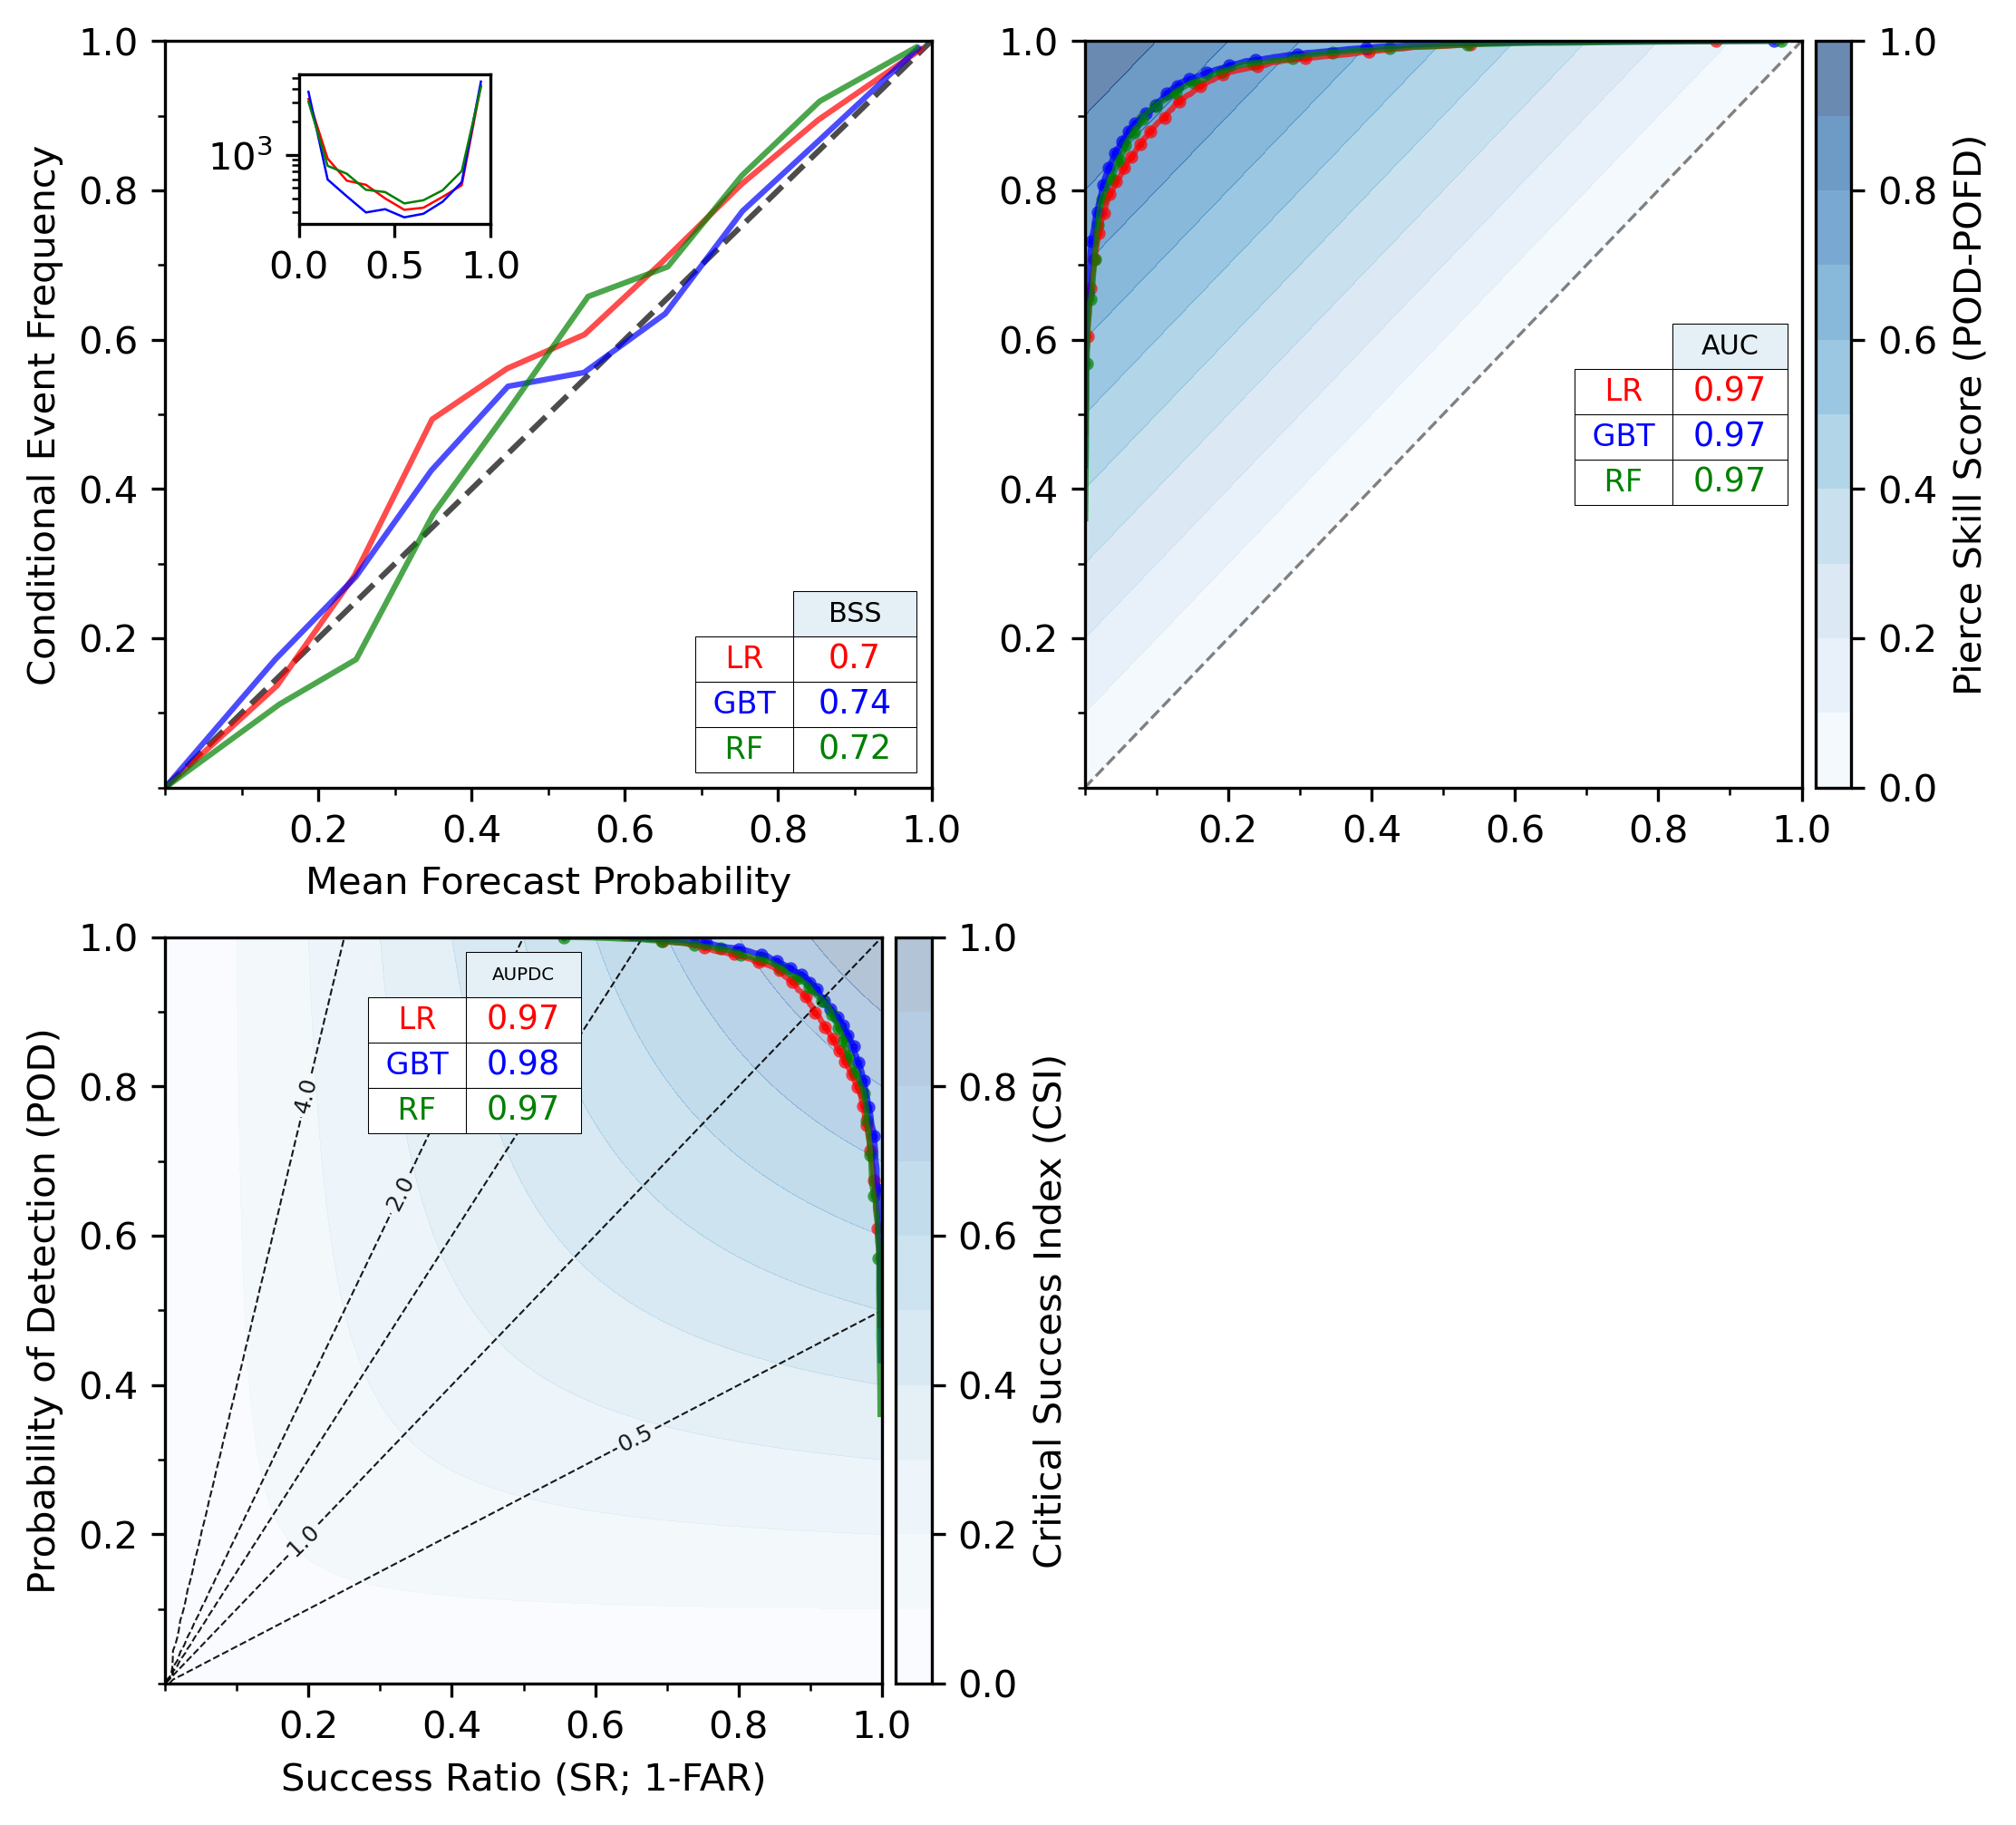

In [6]:
plot_verification(fit_clfs, X_test, y_test.values)

### Save the models using joblib

In [7]:
import joblib 
from os.path import join

# Save the models 
path = '../models'
for name, clf in fit_clfs:
    joblib.dump(clf, join(path, f'{name}_classification.joblib'), compress=3)